## Week 4 : Regularization & Dimensionality Reduction 
```
- Machine Learning, Innopolis University (Fall semester 2024)
- Instructors: Adil Khan & Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Regularization : Lasso and Ridge
2. Selecting optimal alpha for regularization
3. Dimensionality Reduction from scratch with numpy
4. Dimensionality Reduction with Sklearn
5. Assignment 1
```

<hr>


## 1. Regularization : Lasso and Ridge

Both models are the regularized forms of the linear regression.
Lasso with L1 regularization and Ridge with L2 regularization.
Both act as a constraint region for the coeffeicients/weight, where they must reside in.

### Issues:
1. When to use Lasso?
2. When to use Ridge?
3. Since it is hard to decide the parameters influence, How we can decide which regularization? and decide the value of lambda?


## 1.1 Loading California housing dataset

Housing-Prices Values in Suburbs of California

In [1]:
%cd ./../../innopolis/ML/Labs/lab4/

/home/prog3/innopolis/ML/Labs/lab4


/home/prog3/.cache/pypoetry/virtualenvs/classic-ml-SCNkXpGa-py3.10/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics._regression import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)

print('Train shape: ', x_train.shape[0]/X.shape[0]*100,
      '\b%\nValidate shape: ', x_val.shape[0]/X.shape[0]*100,
      '\b%\nTest shape: ', x_test.shape[0]/X.shape[0]*100,'\b%')

Train shape:  70.0%
Validate shape:  10.0%
Test shape:  20.0%


## 1.2 Fitting both Lasso and Ridge
<span style="color:red">Task:  Fit two models: Lasso and Ridge - with the default alpha.
Then print their coefficients and notice the difference.</span>

In [3]:
def get_importance_features(columns, model):
    importance_features = {col: abs(w)  for col, w in zip(columns, model.coef_)}
    importance_features = dict(sorted(importance_features.items(), key=lambda x:x[1], reverse=True))
    return importance_features
    

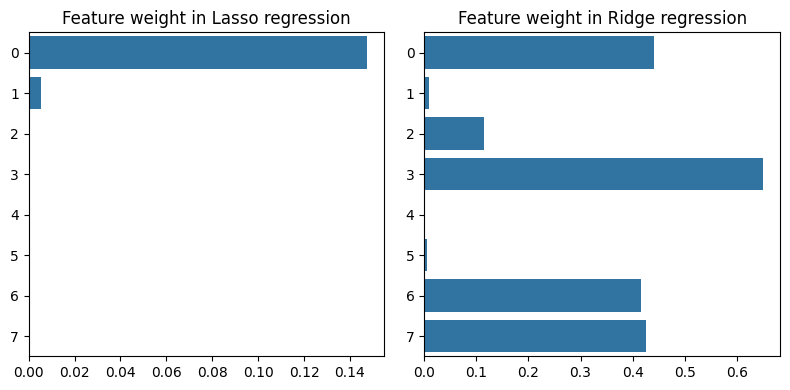

In [4]:
from sklearn.linear_model import Lasso, Ridge
alpha = 1
lasso = Lasso(alpha)
lasso.fit(x_train, y_train)
ridge = Ridge(alpha)
ridge.fit(x_train, y_train)


_, ax = plt.subplots(1, 2, figsize=(8,4))
columns = list(range(x_train.shape[1]))
sns.barplot(get_importance_features(columns, lasso), 
            orient='h', ax=ax[0]
        ).set_title('Feature weight in Lasso regression')
sns.barplot(get_importance_features(columns, ridge), 
            orient='h', ax=ax[1]
        ).set_title('Feature weight in Ridge regression')
plt.tight_layout()
plt.show()

### 1.3 Searching for optimal $\alpha$

<span style="color:red"><strong>Task</strong>: Let's try different values for alpha for Lasso regressor and plot the validation loss.</span>

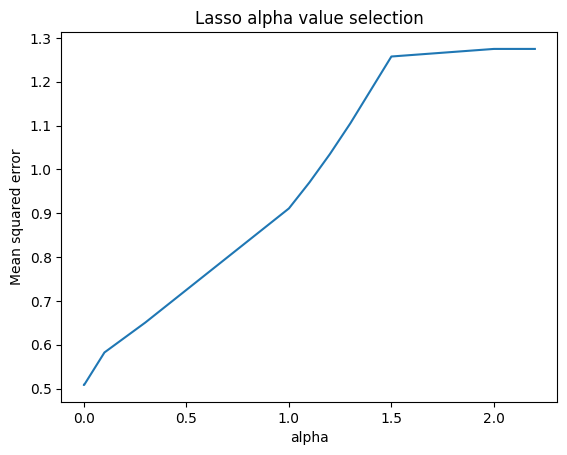

Best value of alpha: 0.001


In [5]:
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1, 0.001, 0.00001]
losses = []
for alpha in alphas:
    lasso = Lasso(alpha)
    lasso.fit(x_train, y_train)
    y_val_pred = lasso.predict(x_val)
    losses.append(mean_squared_error(y_val, y_val_pred))
    
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

Measuring the loss on the testset with Lasso regressor with the best alpha.

In [ ]:
lasso = Lasso(best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("MSE on testset:", mean_squared_error(y_test, y_pred))

MSE on testset: 0.5185364757994538


## 2. Principal Component Analysis (PCA)

1. How does PCA reduce data dimensionality?
2. What is eigenvector?

<span style="color:red"><strong>Task:</strong> Now you will implement basic steps of PCA: mean-centering, eigenvectors calculation using covariance matrix, projecting data to the first PC, and restoring it back.</span>

## 2.1 Generating data

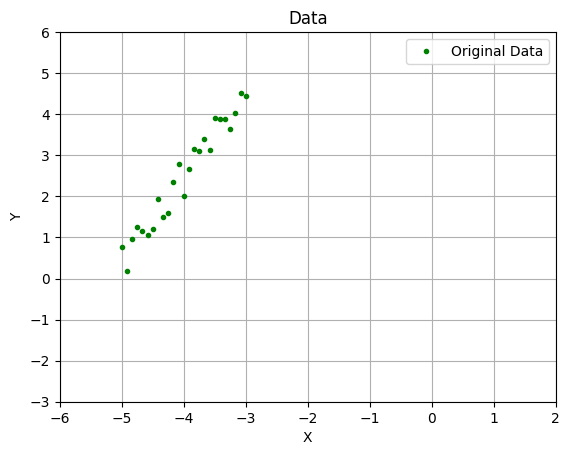

In [7]:
# N is a sample size
N = 25
# we can fix a random seed. It allows us to get the same data
np.random.seed(10)
# form our data
x = np.linspace(-5, -3, N)
y = 10 + 2*x + np.random.random(size=(N,))
data = np.stack([x,y], axis = 1)


plt.title("Data")
plt.plot(data[:,0], data[:,1], '.', label='Original Data', color="green")
plt.legend()

plt.axis([-6, 2, -3, 6])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')

### 2.2 Centering Data

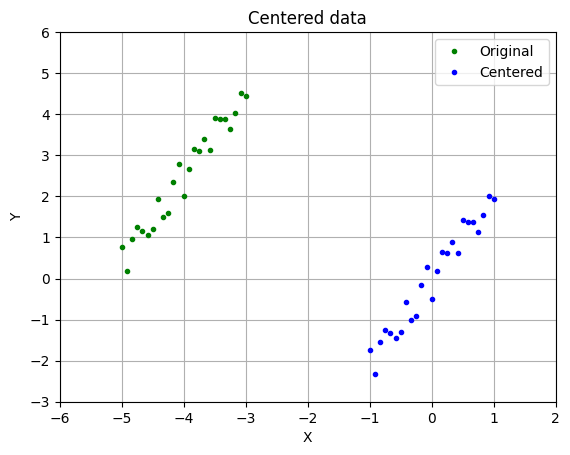

In [8]:
# center data by subtracting mean value from each feature
# pay attention to mean_vector <-- we need it later for restoring our data
mean_vector = np.mean(data, axis=0)
data_centered = data - mean_vector

plt.title("Centered data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="Centered")
plt.axis([-6, 2, -3, 6])
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')

### 2.3 Covariance matrix

In [9]:
# calculate covariance matrix for our centered data
cov_mat = np.cov(data_centered.T)
print('Covariance matrix:\n', cov_mat)

# also, to make sure you understand how to calculate covariance, calculate and print cov(X,Y)
# check that it is the same as in the covariance matrix
cov_xy = 1/(N-1) * np.sum(data_centered[:,0] * data_centered[:,1])
print('\ncov(X,Y):', cov_xy)

Covariance matrix:
 [[0.37615741 0.76801889]
 [0.76801889 1.65019543]]

cov(X,Y): 0.7680188927863001


### 2.4 Eigenvectors and eigenvalues

In [10]:
# compute eigenvectors and eigenvalues, print them
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print('Eigenvalues:', eig_values)
print('Eigenvectors:\n', eig_vectors)

# are they already in the needed order?
# order eigenvectors and eigenvalues by eigenvalues, descending
idx = eig_values.argsort()[::-1]
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]
print('\nsorted eigenvalues:', eig_values)
print('sorted Eigenvectors:\n', eig_vectors)

# estimate variance retained by each principal component
retained_var = eig_values / eig_values.sum()
print('\nRetained variance:',   retained_var)

Eigenvalues: [0.01535567 2.01099716]
Eigenvectors:
 [[-0.90509952 -0.42519979]
 [ 0.42519979 -0.90509952]]

sorted eigenvalues: [2.01099716 0.01535567]
sorted Eigenvectors:
 [[-0.42519979 -0.90509952]
 [-0.90509952  0.42519979]]

Retained variance: [0.99242201 0.00757799]


### 2.5 Project data

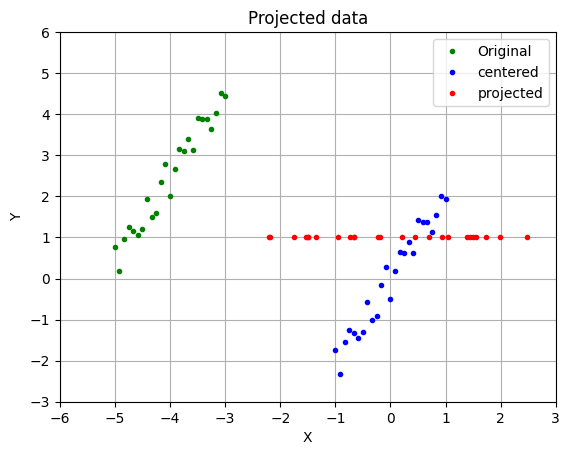

In [11]:
# project data to the first principal component
first_pc = np.expand_dims(eig_vectors[:,0], axis=1)
projected_data = np.dot(data_centered, first_pc)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="centered")
plt.plot(projected_data, np.ones(len(projected_data)), '.', color="red",  label="projected")
plt.axis([-6, 3, -3, 6])
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')

### 2.6 Restore data back

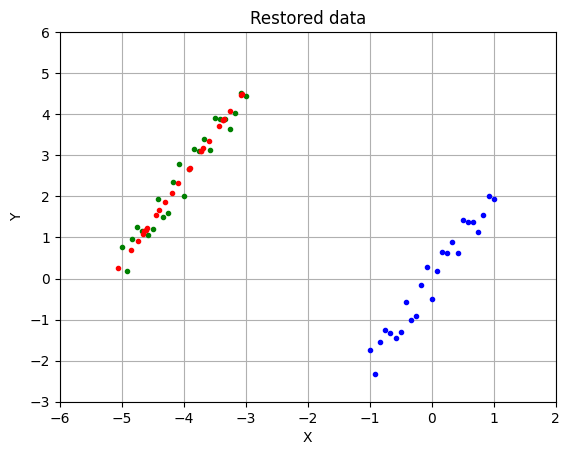

In [12]:
# project data back to initial space
# remember to add a mean_vector to the restored data
restored_data = np.dot(projected_data, first_pc.T) + mean_vector

plt.title("Restored data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(restored_data[:,0], restored_data[:,1], '.', color="red")
plt.axis([-6, 2, -3, 6])
plt.grid('True')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 3. SKLEARN implementation

Mean :  [-4.          2.50055666]
explained variance :  [2.01099716]
explained variance ratio:  [0.99242201]


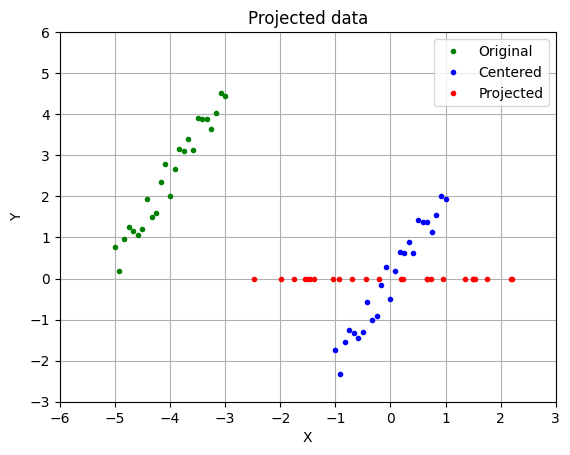

In [13]:
# this is to check your solution
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_PCA = pca.fit_transform(data)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="Centered")
plt.plot(x_PCA, np.zeros(len(projected_data)), '.', color="red", label="Projected")
plt.axis([-6, 3, -3, 6])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')
plt.legend()

print('Mean : ', pca.mean_)
print('explained variance : ',pca.explained_variance_)
print('explained variance ratio: ',pca.explained_variance_ratio_)

### explained variance ratio

It provides insights into the amount of information retained by each principal component and helps assess their significance in capturing the underlying patterns in the data

In [14]:
pca.explained_variance_ratio_

array([0.99242201])

In [15]:
pca.inverse_transform(projected_data) - data

array([[ 1.84628811,  3.53068317],
       [ 1.97260214,  4.56085006],
       [ 1.57418923,  3.11059446],
       [ 1.36733086,  2.56583118],
       [ 1.30111622,  2.685901  ],
       [ 1.24391221,  2.84856477],
       [ 1.09165973,  2.56192747],
       [ 0.71265411,  1.20341154],
       [ 0.77772001,  1.94405408],
       [ 0.64626366,  1.75572161],
       [ 0.25396071,  0.33434822],
       [-0.01173242, -0.48853129],
       [ 0.19111881,  0.90343255],
       [-0.16701887, -0.35643908],
       [-0.44517922, -1.23825204],
       [-0.530714  , -1.20950991],
       [-0.7352916 , -1.74349186],
       [-0.7323943 , -1.29672486],
       [-1.13581092, -2.77063334],
       [-1.22015135, -2.73624541],
       [-1.3164863 , -2.75855651],
       [-1.32494392, -2.36546503],
       [-1.57645047, -3.12128351],
       [-1.85475096, -4.00375895],
       [-1.9278915 , -3.91642833]])

## 3. SKLEARN implementation

Mean :  [-4.          2.50055666]
explained variance :  [2.01099716]
explained variance ratio:  [0.99242201]


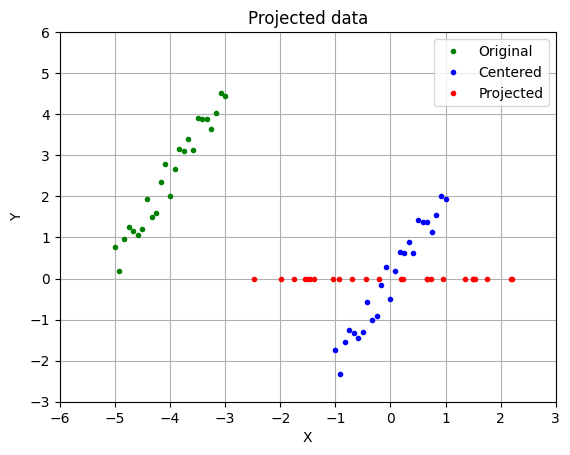

In [16]:
# this is to check your solution
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_PCA = pca.fit_transform(data)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="Centered")
plt.plot(x_PCA, np.zeros(len(projected_data)), '.', color="red", label="Projected")
plt.axis([-6, 3, -3, 6])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')
plt.legend()

print('Mean : ',pca.mean_)
print('explained variance : ',pca.explained_variance_)
print('explained variance ratio: ',pca.explained_variance_ratio_)

## <center>Self-Practice  Task</center>

* Using dataset given for you Assignment task 2.
    1. Train a logistic regression model with Regularization
    1. Train a logistic regression model with data after PCA
    1. Calculate Accuracy, Precision and Recall values for each of the above trained models

In [18]:
import pandas as pd

target = 'on_time'
trainset = pd.read_csv('../../assignment/content/train_clf.csv')
X_train, y_train = trainset.drop(columns=target), trainset[target]

testset = pd.read_csv('../../assignment/content/test_clf.csv')
X_test, y_test = testset.drop(columns=target), testset[target]

### Using dataset given for you Assignment task 2.

#### Train a logistic regression model with Regularization

In [19]:
from sklearn.linear_model import LogisticRegression

This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. Note that regularization is applied by default. It can handle both dense and sparse input. 

The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.

In [20]:
clf = LogisticRegression(random_state=42,
                         solver='liblinear',
                         penalty='l1').fit(X_train, y_train)

In [21]:
clf.coef_

array([[ 2.13220238e+00,  1.24318760e-01, -1.34159415e-02,
        -5.67518564e+00,  7.82879198e-01,  8.56423215e-01,
         1.70371451e+00,  6.95952994e-01,  1.03563219e+00,
         1.08419926e-01, -6.53566576e+00, -2.02609011e-02,
        -1.08746879e-02,  4.98470700e-03, -2.28430893e-02,
         3.71615533e-03,  0.00000000e+00,  2.41251451e-01,
        -7.69315712e-02,  1.18339016e-02, -4.34175377e-03,
         1.55955040e-02, -4.88136843e-05,  1.55721555e-03,
         0.00000000e+00,  4.20190409e-03,  4.35114037e-03,
        -1.41141430e-01,  4.56171704e-02,  5.20021444e-03,
         3.06182552e-03]])

In [24]:
from sklearn import metrics


target_metrics = [metrics.roc_auc_score]
objective_names = ['ROC AUC']

In [22]:
def get_best_threshold(model, X_test, y_test, objective_targets, objectives_names=None, plot=False):
    thresholds = np.arange(0.1, 0.9, 0.01)
    pred_proba = model.predict_proba(X_test)

    averaged_results = []
    results = [[] for i in range(len(objective_targets)) ]
    for i in thresholds:
        y_test_pred_thr = np.where(pred_proba[:, 1] > i, 1, 0)
        [
            results[idx].append(metric_func(y_test, y_test_pred_thr)) 
            for idx, metric_func 
            in enumerate(objective_targets)
        ]
        averaged_results.append(np.min([result[-1] for result in results]))
    
    if plot:
        [plt.plot(thresholds, results[idx], label=objectives_names[idx]) 
        for idx, metric in enumerate(objective_targets)]
        plt.title('Threshold Selection')
        plt.xlabel('threshold')
        plt.ylabel('score')
        plt.legend()
        plt.grid()

    return np.max(averaged_results), thresholds[np.argmax(averaged_results)]

(np.float64(0.5668843875534006), np.float64(0.44999999999999984))

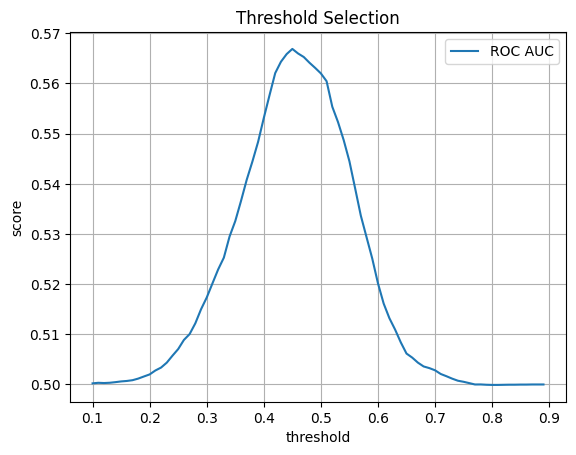

In [25]:
roc_auc_score, best_threshold = get_best_threshold(clf, X_test, y_test, target_metrics, objective_names, True)
roc_auc_score, best_threshold

In [26]:
cv_scoring='roc_auc'
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [27]:
def scores(estimator, X_test, y_test, X_train, y_train, cv=5, cv_scoring=cv_scoring, threshold=0.5, plot=True, ax=None):
    precision = 3
    if threshold:
        pred_proba = estimator.predict_proba(X_test)
        y_test_pred = np.where(pred_proba[:, 1] > threshold, 1, 0)
    else:
        y_test_pred = estimator.predict(X_test)

    # calculate metrics
    print(f'- Testing accuracy = {metrics.accuracy_score(y_test, y_test_pred):.{precision}f}',
          f'\n- Testing precision = {metrics.precision_score(y_test, y_test_pred):.{precision}f}',
          f'\n- Testing recall = {metrics.recall_score(y_test, y_test_pred):.{precision}f}',
          f'\n- Testing f1_score = {metrics.f1_score(y_test, y_test_pred):.{precision}f}',
          f'\n- Testing ROC AUC = {metrics.roc_auc_score(y_test, y_test_pred):.{precision}f}')
    if cv:
        print('- Cross validate: ', cross_val_score(estimator, 
                                                                  pd.concat([X_train, X_test]), 
                                                                  pd.concat([y_train, y_test]), 
                                                                  cv=cv, scoring=cv_scoring))
  
    if plot: 
        cm = confusion_matrix(y_test, y_test_pred, labels=estimator.classes_, 
                          normalize='true'
                        )
        ConfusionMatrixDisplay(cm, display_labels=estimator.classes_).plot(ax=ax)
        return cm
    

In [28]:
def logistic_regressor_scores(clf, X_test, y_test, X_train, y_train, cv=5, cv_scoring=cv_scoring, best_threshold=0.5, plot=False):
    print("----Logistic Regression Coefficients----")
    importance_features = {col: abs(w)  for col, w in zip(list(X_train.columns), clf.coef_[0])}
    importance_features = dict(sorted(importance_features.items(), key=lambda x:x[1], reverse=True))

    _, axes = plt.subplots(1,2, figsize=(12,5))
    sns.barplot(importance_features, 
                orient='h',
                ax=axes[0]).set_title('Feature weight in Logistic regression')

    scores(clf, X_test, y_test, X_train, y_train, cv, cv_scoring, threshold=best_threshold, ax=axes[1], plot=plot)
    plt.tight_layout()
    plt.show()

----Logistic Regression Coefficients----
- Testing accuracy = 0.565 
- Testing precision = 0.515 
- Testing recall = 0.590 
- Testing f1_score = 0.550 
- Testing ROC AUC = 0.567


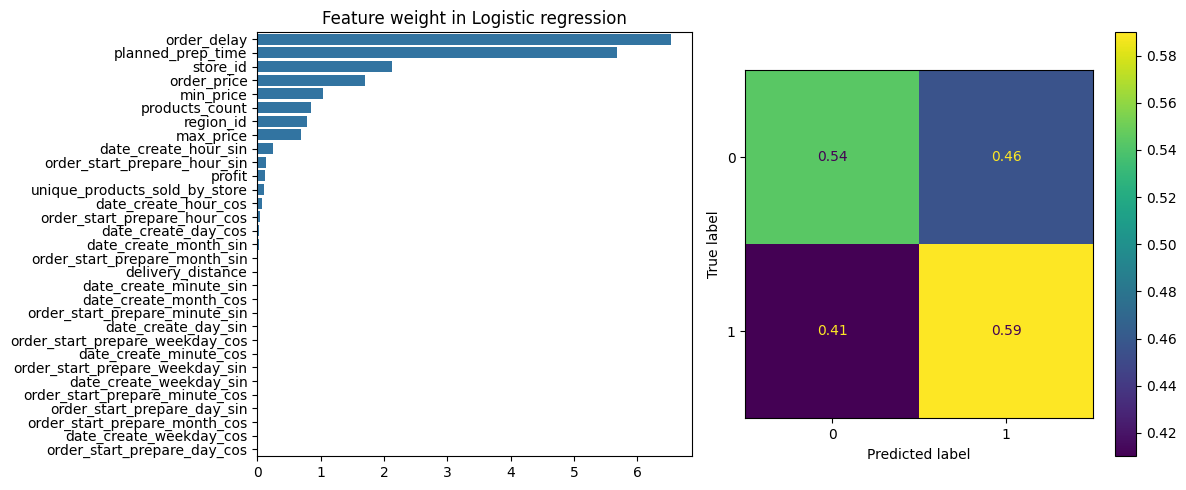

In [29]:
logistic_regressor_scores(clf, X_test, y_test, X_train, y_train, cv=None, cv_scoring=None, best_threshold=best_threshold, plot=True)

#### Train a logistic regression model with data after PCA

----Logistic Regression Coefficients----
- Testing accuracy = 0.531 
- Testing precision = 0.466 
- Testing recall = 0.273 
- Testing f1_score = 0.345 
- Testing ROC AUC = 0.508


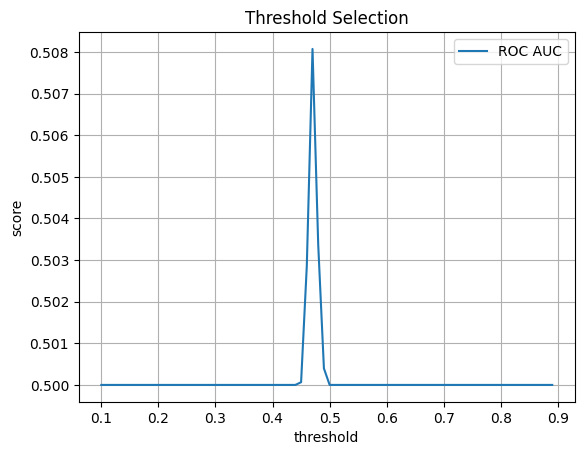

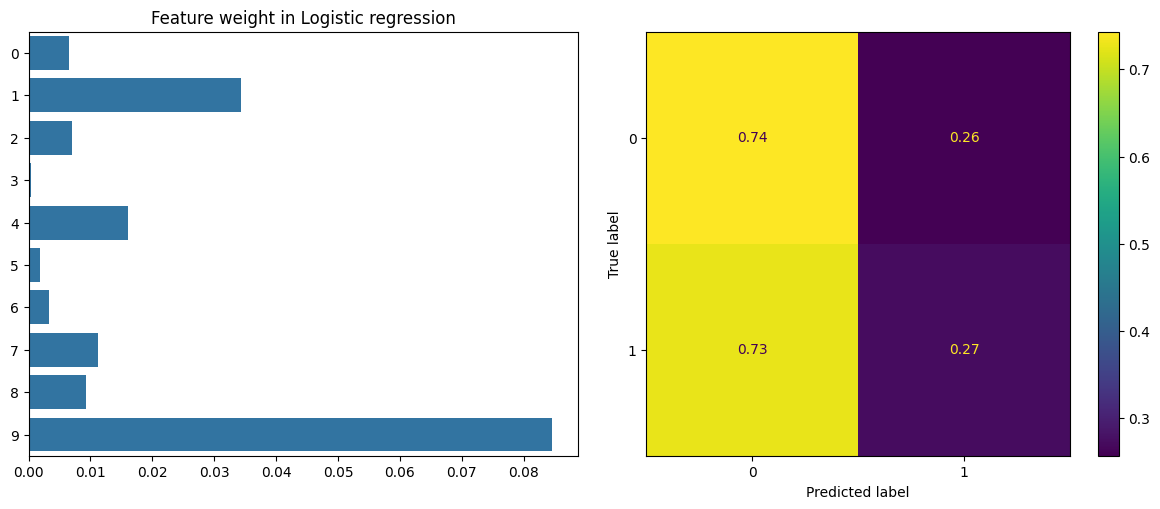

In [30]:
n_components = 10
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train), columns=range(n_components), index=X_train.index)
X_test_pca = pd.DataFrame(pca.transform(X_test), columns=range(n_components), index=X_test.index)

clf_pca = LogisticRegression(random_state=42,
                         solver='liblinear',
                         penalty='l1').fit(X_train_pca, y_train)


roc_auc_score, best_threshold = get_best_threshold(clf_pca, X_test_pca, y_test, target_metrics, objective_names, True)

logistic_regressor_scores(clf_pca, X_test_pca, y_test, X_train_pca, y_train, cv=None, cv_scoring=None, best_threshold=best_threshold, plot=True)